# <font color='red'>Assignment 10.1</font> : 8A LR SVM

In [1]:
import warnings
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

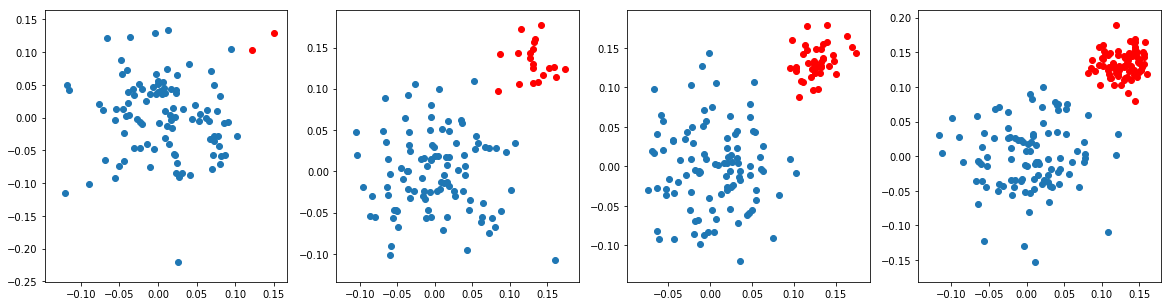

In [3]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## <font color='red'>Task 1</font>: Applying SVM

In [4]:
dataSet = {}
#color = ['r', 'g', 'b']
regr_strength = [0.001, 1, 100]
classifier_SVC = SVC(kernel = 'linear')

for p_pnts_ratio, n_pnts_ratio in ratios:
    
    p_pnts = np.random.normal(loc = 0, scale = 0.05, size = (p_pnts_ratio, 2))
    p_pnts_y = np.ones((p_pnts.shape[0], 1))
    
    n_pnts = np.random.normal(loc = 0.13, scale = 0.02, size = (n_pnts_ratio, 2))
    n_pnts_y = np.zeros((n_pnts.shape[0], 1))
    
    dataSet.update({
                    (p_pnts_ratio, n_pnts_ratio) :
                    {
                     'p_pnts' : p_pnts,
                     'n_pnts' : n_pnts, 
                     'p_pnts_y' : p_pnts_y,
                     'n_pnts_y' : n_pnts_y
                     }
                    })

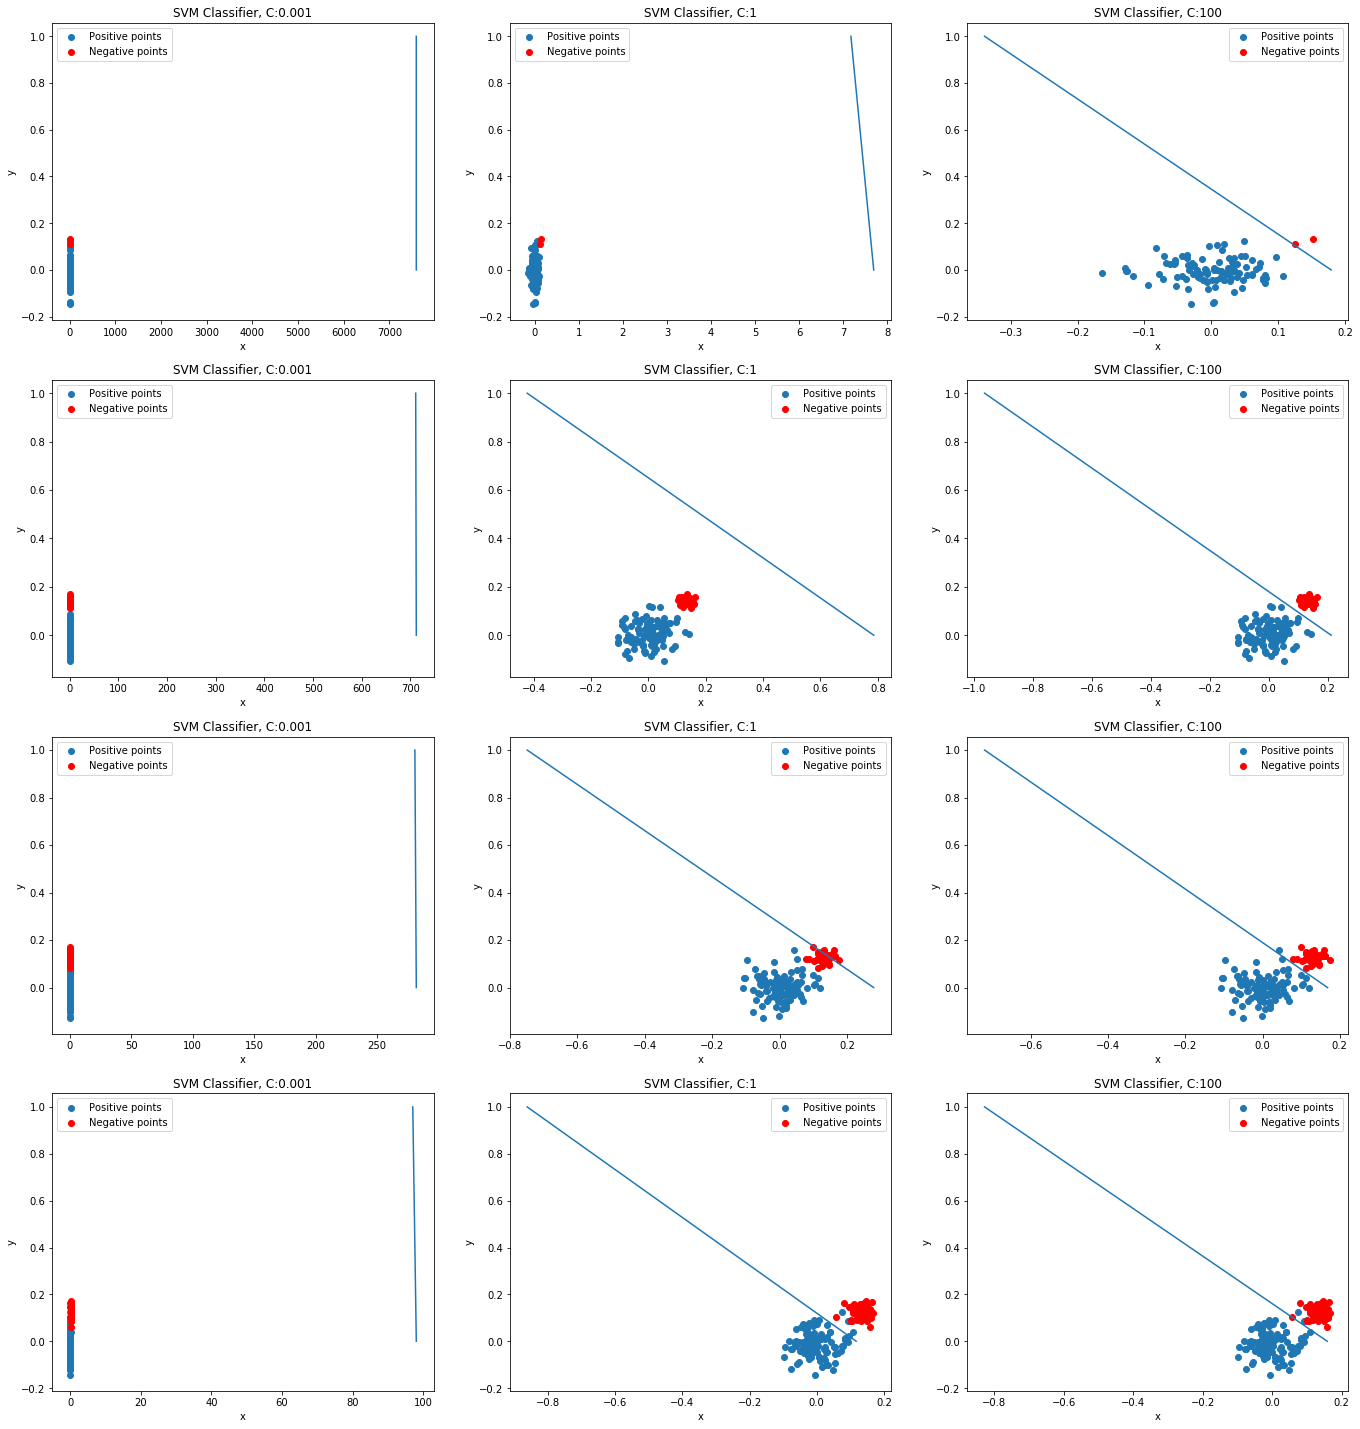

In [53]:
def Plot_Plane(dataSet, ratios, regr_strength, classifier, title):

    plt.subplots(nrows = 3, ncols = 4, figsize = (10, 10))
    plt.subplots_adjust(left = 0.2, bottom = 0.1, right = 2, top = 2)
    count = 1
    for row, ratio in enumerate(ratios):

        p_pnts= dataSet.get(ratio).get('p_pnts')
        p_pnts_y = dataSet.get(ratio).get('p_pnts_y')

        n_pnts = dataSet.get(ratio).get('n_pnts')
        n_pnts_y = dataSet.get(ratio).get('n_pnts_y')

        for col, reg in enumerate(regr_strength):
            plt.subplot(4, 3, count, xlabel = 'x', ylabel = 'y', title = str(title) + str(reg))
            count +=1

            classifier.C = reg
            point = np.vstack((p_pnts, n_pnts))
            output = np.vstack((p_pnts_y, n_pnts_y)) 
            classifier.fit(point, output)

            plt.scatter(p_pnts[:,0], p_pnts[:,1], label = "Positive points")
            plt.scatter(n_pnts[:,0], n_pnts[:,1], label = "Negative points", color = 'red')
            draw_line(classifier.coef_[0], classifier.intercept_[0], 0, 1)
            plt.legend()
            
Plot_Plane(dataSet, ratios, regr_strength, classifier_SVC, 'SVM Classifier, C:')

## <font color='blue'>Observation</font> :

1. From the above observation we can say that Regularization Hyperparameter (C) impact most on the Seprating Hyperplan (PI)(to seprating the positive and negative class).

2. From optimization function we can say that :
        A> If C tends to infinity then our model will OVERFIT C = 1
        B> If C come close to 0 (Zero), then our model will UNDERFIT C = 0.001
        
3. Here main task is to find best C (Regularization Hyperparameter) which follows Bias Variance Trade off and we can say that here we got our best C (Regularization Hyperparameter) as c = 100.

## <font color='red'>Task 2</font>: Applying LR

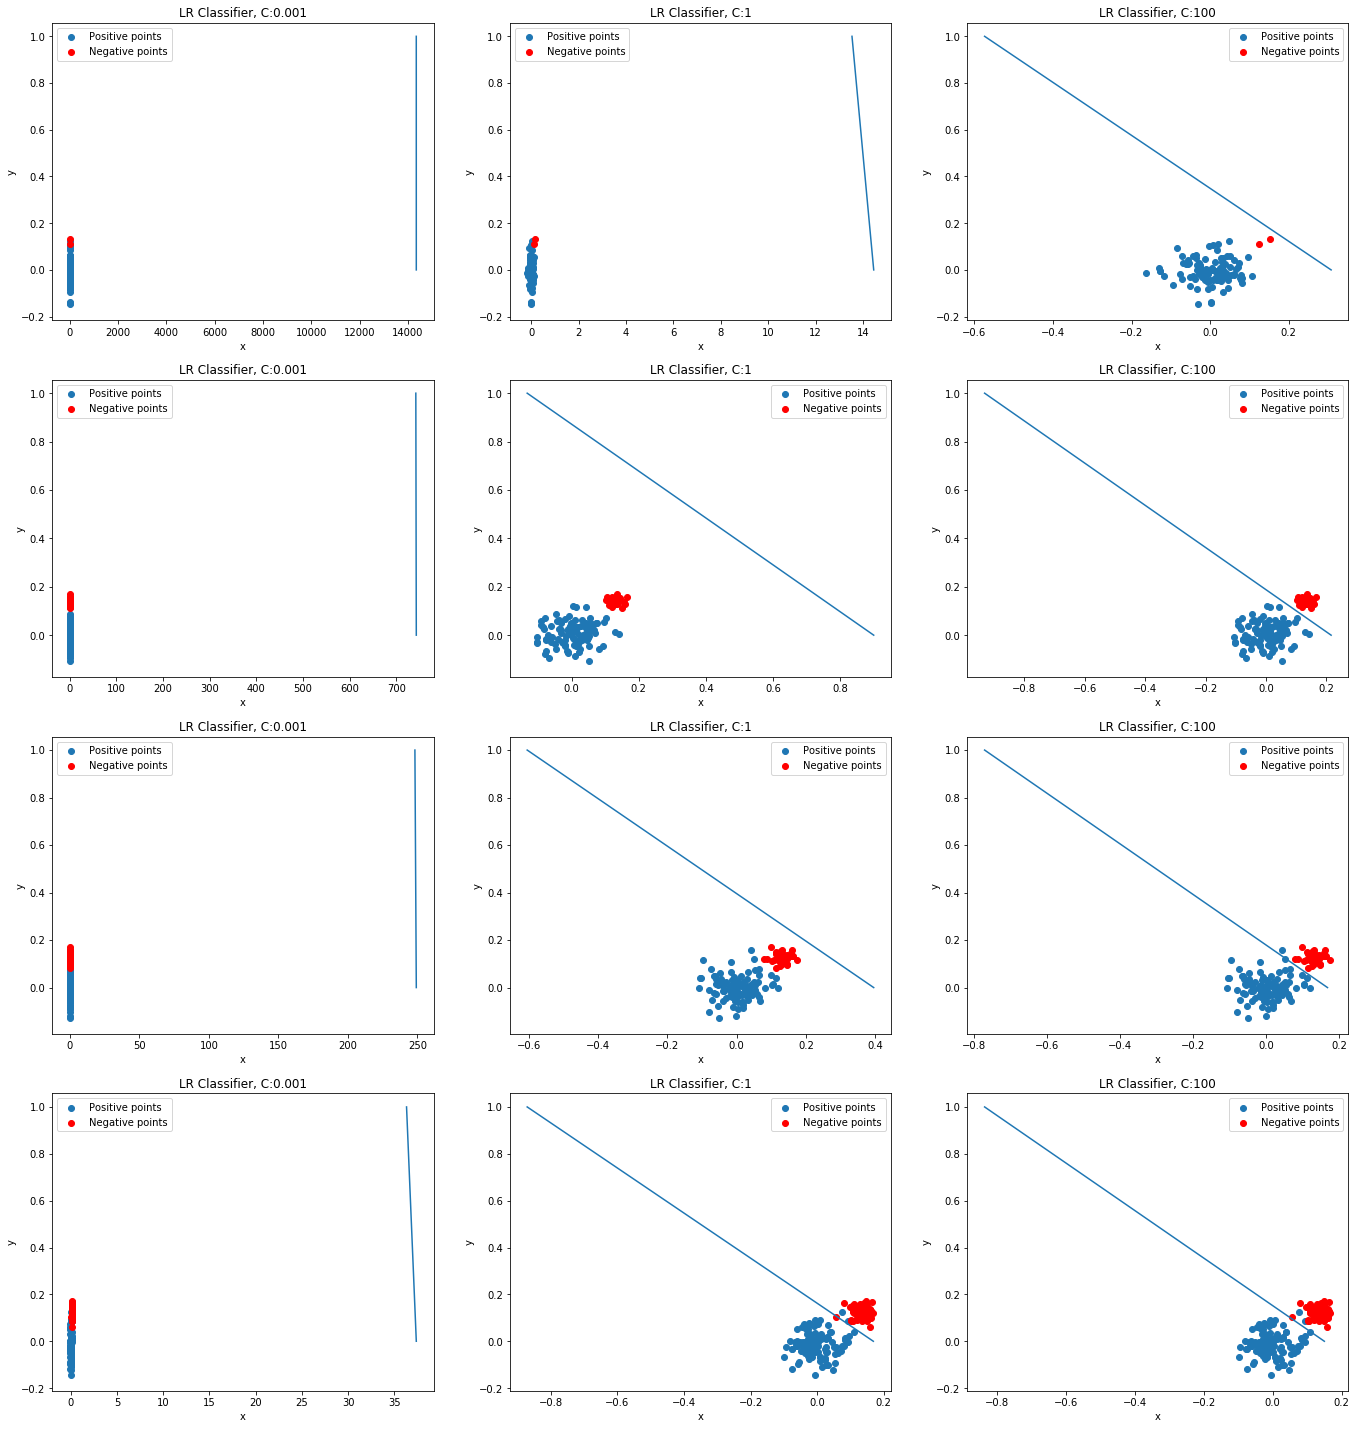

In [54]:
classifier_LR = LogisticRegression()
Plot_Plane(dataSet, ratios, regr_strength, classifier_LR, 'LR Classifier, C:')